In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch

from library import evals

ROOT = './results'

CMAP_t10 = mpl.color_sequences['tab10']

data_info_root = evals.constants.smallscale()

sm_data_info = data_info_root.sm_data_info
eos_data_info = data_info_root.eos_data_info

ovr_data_info = data_info_root.ovr_data_info
ovr_data_info_neg = data_info_root.ovr_data_info_neg

ovr_data_info_10k = data_info_root.ovr_data_info_10k
ovr_data_info_20k = data_info_root.ovr_data_info_20k
ovr_data_info_30k = data_info_root.ovr_data_info_30k

# Result: Small-scale

## Hyperparameter Tuning

### Loss weighting parameter: Neg = 0
- Best C OvR : global 
- Best F OvR : 2
- Best M OvR : 0.4

In [3]:
# Class balancing - batch/global
data_info = ovr_data_info['C']
results = evals.print_metrics(data_info, results_root=ROOT, show_osa_v=True)

maxOSA_V↑	maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓
0.8641	0.8623	0.8224	0.0500	0.0346	1.0831	1.1520
0.8711	0.8697	0.8187	0.0510	0.0249	1.0334	1.1195


In [4]:
# Focal loss weighting - 0.2, 0.6, 1, 2, 3
data_info = ovr_data_info['F']
results = evals.print_metrics(data_info, results_root=ROOT, show_osa_v=True)

maxOSA_V↑	maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓
0.8796	0.8843	0.8437	0.0910	0.0106	0.6720	0.8150
0.8471	0.8479	0.8036	0.0880	0.0132	0.7348	0.8143
0.8853	0.8877	0.8302	0.0760	0.0102	0.6885	0.8275
0.8909	0.8892	0.8357	0.0790	0.0060	0.6378	0.8093
0.8907	0.8914	0.8346	0.0850	0.0077	0.6461	0.7899


In [5]:
# Hard negative mining - 0, 0.2, 0.4, 0.6, 0.8
data_info = ovr_data_info['H']
results = evals.print_metrics(data_info, results_root=ROOT, show_osa_v=True)

maxOSA_V↑	maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓


0.8686	0.8663	0.8225	0.1040	0.0088	0.6611	0.7831
0.8674	0.8676	0.8206	0.0800	0.0164	0.8101	0.8659
0.8775	0.8785	0.8156	0.0620	0.0242	0.9386	1.0457
0.8523	0.8498	0.7686	0.0630	0.0240	0.9468	1.0751
0.8539	0.8527	0.8121	0.0540	0.0220	1.0333	1.0569


### Loss weighting parameter: Neg = All
- Best C OvR : batch 
- Best F OvR : 1
- Best M OvR : 0.2

In [6]:
# Class balancing - batch/global
data_info = ovr_data_info_neg['C']
results = evals.print_metrics(data_info, results_root=ROOT, show_osa_v=True)

maxOSA_V↑	maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓


0.9789	0.9801	0.8605	0.1770	0.0120	0.0241	0.3970
0.9786	0.9785	0.8577	0.1920	0.0111	0.0238	0.3989


In [7]:
# Class balancing - batch/global
data_info = ovr_data_info_neg['F']
results = evals.print_metrics(data_info, results_root=ROOT, show_osa_v=True)

maxOSA_V↑	maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓


0.9784	0.9791	0.8582	0.2430	0.0086	0.0173	0.3595
0.9783	0.9785	0.8597	0.2180	0.0091	0.0207	0.3719
0.9785	0.9786	0.8544	0.2840	0.0070	0.0159	0.3508
0.9772	0.9784	0.8568	0.3120	0.0071	0.0130	0.3443
0.9776	0.9789	0.8610	0.2660	0.0068	0.0169	0.3580


In [8]:
# Class balancing - batch/global
data_info = ovr_data_info_neg['H']
results = evals.print_metrics(data_info, results_root=ROOT, show_osa_v=True)

maxOSA_V↑	maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓


0.9785	0.9798	0.8497	0.2380	0.0076	0.0156	0.3868
0.9793	0.9788	0.8511	0.2500	0.0077	0.0162	0.3626
0.9789	0.9782	0.8529	0.2430	0.0081	0.0184	0.3802
0.9791	0.9783	0.8554	0.1930	0.0111	0.0245	0.3890
0.9785	0.9793	0.8601	0.1940	0.0100	0.0225	0.3945


## Metrics Plots

In [9]:
data_info_base = [sm_data_info[0],eos_data_info[-1]]
data_info_ovr = [
    [ovr_data_info['base'][0],ovr_data_info_10k['base'][0],ovr_data_info_20k['base'][0],ovr_data_info_30k['base'][0],ovr_data_info_neg['base'][0]],
    [ovr_data_info['C'][1],ovr_data_info_10k['C'][0],ovr_data_info_20k['C'][0],ovr_data_info_30k['C'][0],ovr_data_info_neg['C'][0]],
    [ovr_data_info['F'][3],ovr_data_info_10k['F'][0],ovr_data_info_20k['F'][0],ovr_data_info_30k['F'][0],ovr_data_info_neg['F'][2]],
    [ovr_data_info['H'][2],ovr_data_info_10k['H'][0],ovr_data_info_20k['H'][0],ovr_data_info_30k['H'][0],ovr_data_info_neg['H'][1]],
]
labels = ['OvR','OvR-C','OvR-F','OvR-H']

FPR_K
FPR_U
FPR_N
FNR
OSA_N
OSA_U


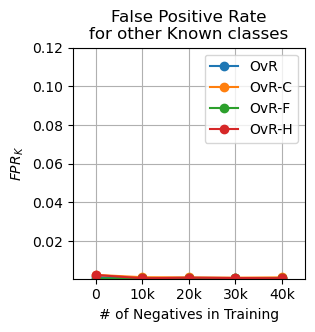

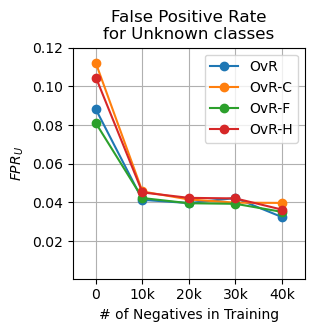

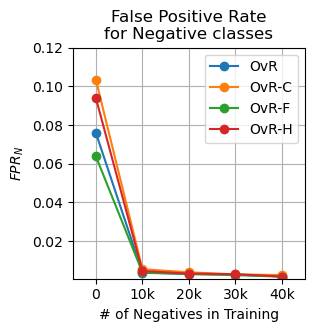

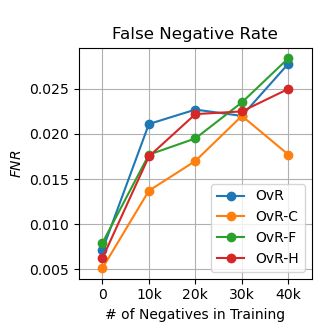

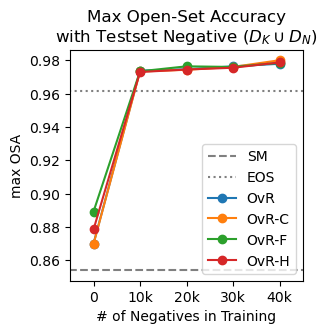

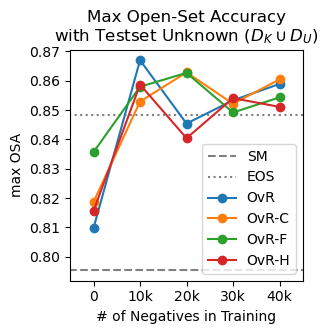

In [10]:
evals.plot_metrics_s(data_info_base, data_info_ovr, labels, results_root=ROOT)

## OSA Plots


In [102]:
data_info = [sm_data_info[0],
             ovr_data_info['base'][0],
             ovr_data_info['C'][1], ovr_data_info['F'][3], ovr_data_info['H'][2]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['smallscale', 'LeNet_neg_0', 'SoftMax']
['smallscale', 'LeNet_neg_0', 'OvR']
['smallscale', 'LeNet_C_neg_0_g', 'OvR']
['smallscale', 'LeNet_F_neg_0_2', 'OvR']
['smallscale', 'LeNet_H_neg_0_04', 'OvR']


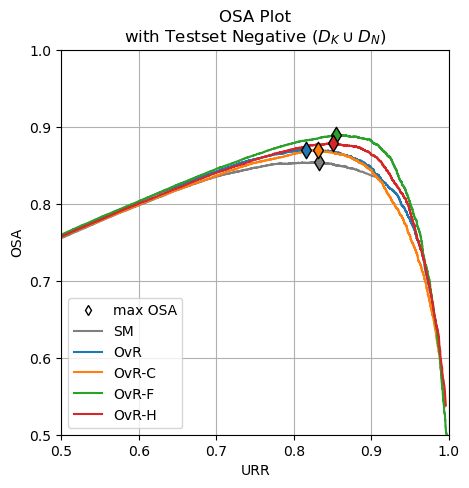

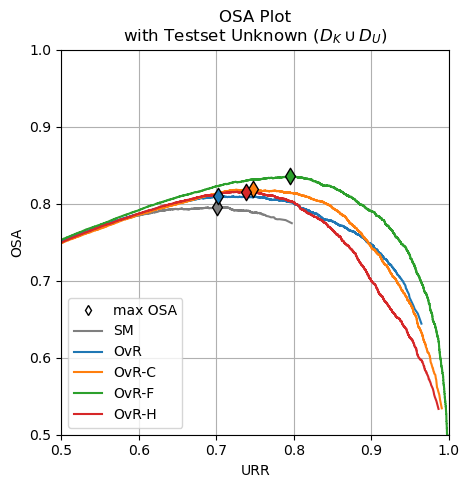

In [103]:
labels = ['SM', 'OvR', 'OvR-C', 'OvR-F', 'OvR-H']
colors = [CMAP_t10[-3]] + CMAP_t10[0:len(data_info)-1]
evals.plot_OSA(data_info, colors, results_root=ROOT, labels = labels, figsize = (5,5), lim=((0.5,1),(0.5,1)),
               show_point=(False, True))

In [104]:
data_info = [eos_data_info[-1],
             ovr_data_info_neg['base'][0],
             ovr_data_info_neg['C'][0], ovr_data_info_neg['F'][2], ovr_data_info_neg['H'][1]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['smallscale', 'LeNet_neg_All', 'EOS']
['smallscale', 'LeNet_neg_All', 'OvR']
['smallscale', 'LeNet_C_neg_All_b', 'OvR']
['smallscale', 'LeNet_F_neg_All_1', 'OvR']
['smallscale', 'LeNet_H_neg_All_02', 'OvR']


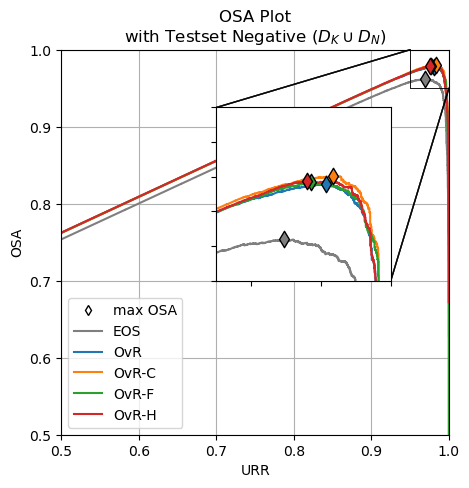

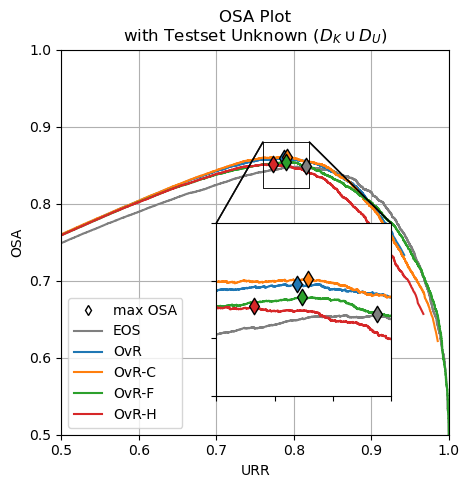

In [105]:
labels = ['EOS', 'OvR', 'OvR-C', 'OvR-F', 'OvR-H']
colors = [CMAP_t10[-3]] + CMAP_t10[0:len(data_info)-1]
evals.plot_OSA(data_info, colors, results_root=ROOT, labels=labels, figsize = (5,5), lim=((0.5,1),(0.5,1)),
               show_point=(False, True),
               zoom=((True, (0.95,1.0,0.95,1.0),(0.4,0.4,0.45,0.45)), 
                     (True, (0.76,0.82,0.82,0.88),(0.4,0.1,0.45,0.45))))

## Score Distribution

['smallscale', 'LeNet_neg_0', 'SoftMax']
['smallscale', 'LeNet_neg_0', 'OvR']
['smallscale', 'LeNet_C_neg_0_g', 'OvR']
['smallscale', 'LeNet_F_neg_0_2', 'OvR']
['smallscale', 'LeNet_H_neg_0_04', 'OvR']
[0.56 0.07 0.03 0.01] [9.916e+01 6.000e-02 4.000e-02 4.000e-02]
[0.43 0.05 0.05 0.03] [97.89  0.3   0.17  0.1 ]
[0.33 0.05 0.05 0.  ] [95.47  0.74  0.5   0.22]
[0.41 0.13 0.05 0.03] [98.4   0.33  0.18  0.17]
[0.28 0.06 0.06 0.03] [95.55  0.7   0.46  0.19]


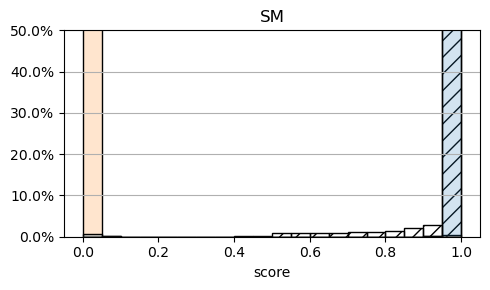

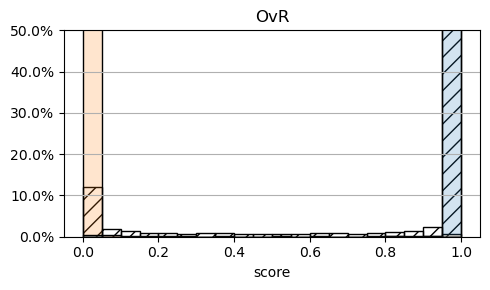

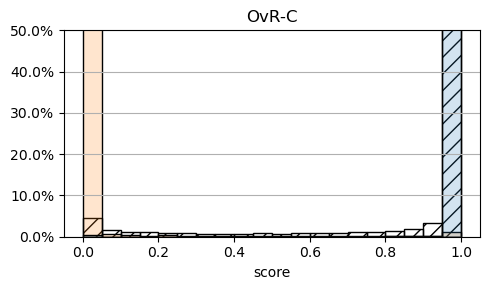

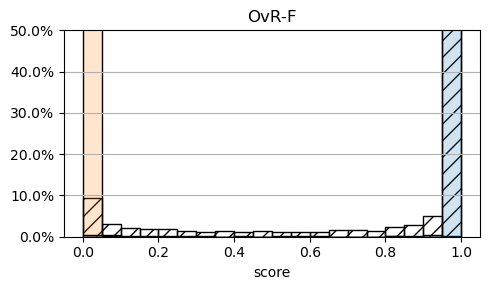

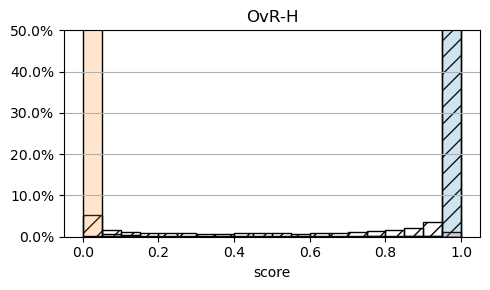

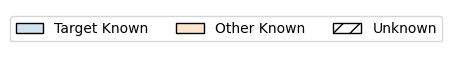

In [16]:
data_info = [sm_data_info[0],
             ovr_data_info['base'][0],
             ovr_data_info['C'][1],ovr_data_info['F'][3],ovr_data_info['H'][2]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

start, stop, step = 0, 1, 0.05
colors=(CMAP_t10[0],CMAP_t10[1],CMAP_t10[2],'white')
alpha = [0.2]*len(colors)
bins = np.arange(start=start,stop=stop+step, step=step)
title = ['SM','OvR','OvR-C','OvR-F','OvR-H']
legend = evals.plot_score_dist(data_info, bins, colors=list(zip(colors,alpha)), results_root=ROOT, title = title,
                               figsize=(5,3), ylim=(0,50), plot_neg=False)

# Composing separate legend plot
labels = ['Target Known', 'Other Known', 'Negative', 'Unknown']
legend_elements = [Patch(facecolor=list(zip(colors,alpha))[0], label=labels[0], edgecolor='black'),
                  Patch(facecolor=list(zip(colors,alpha))[1], label=labels[1], edgecolor='black'),
                #   Patch(facecolor=list(zip(colors,alpha))[2], label=labels[2], edgecolor='black',hatch='//'),
                  Patch(facecolor=list(zip(colors,alpha))[3], label=labels[3], edgecolor='black',hatch='//'),]
# Create the figure
fig, ax = plt.subplots(figsize=(5,0.5))
ax.legend(handles=legend_elements, loc='center', ncol=4)
ax.axes.axis("off")
plt.show()

['smallscale', 'LeNet_neg_All', 'EOS']
['smallscale', 'LeNet_neg_All', 'OvR']
['smallscale', 'LeNet_C_neg_All_b', 'OvR']
['smallscale', 'LeNet_F_neg_All_1', 'OvR']
['smallscale', 'LeNet_H_neg_All_02', 'OvR']
[0.62 0.4  0.66 0.4 ] [92.75  2.34  1.6   0.64]
[2.12 0.11 0.13 0.05] [9.896e+01 1.700e-01 3.000e-02 5.000e-02]
[1.2  0.14 0.15 0.03] [98.16  0.27  0.14  0.1 ]
[1.55 0.26 0.14 0.18] [9.844e+01 2.800e-01 1.400e-01 9.000e-02]
[1.75 0.24 0.13 0.03] [9.882e+01 1.000e-01 1.400e-01 7.000e-02]


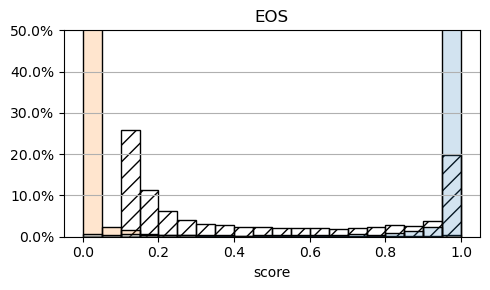

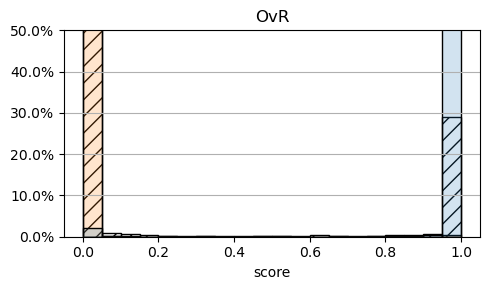

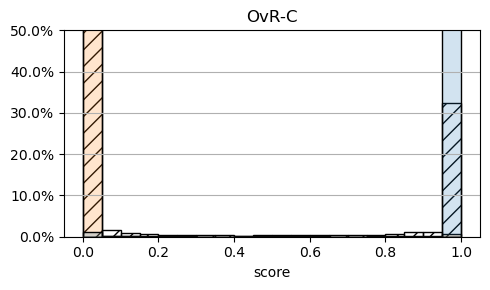

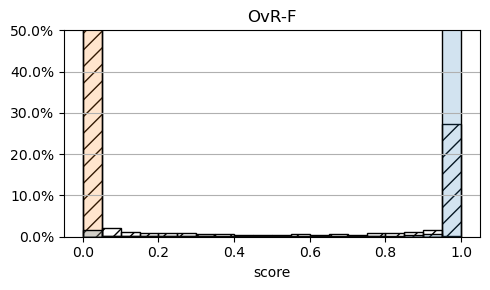

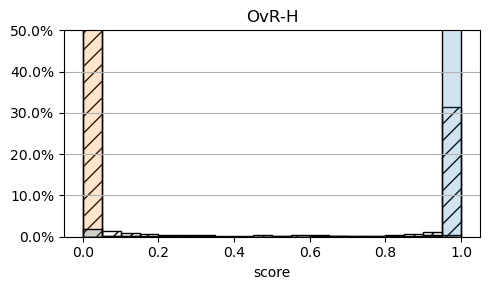

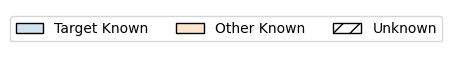

In [15]:
data_info = [eos_data_info[-1],
             ovr_data_info_neg['base'][0],
             ovr_data_info_neg['C'][0], ovr_data_info_neg['F'][2], ovr_data_info_neg['H'][1]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

start, stop, step = 0, 1, 0.05
colors=(CMAP_t10[0],CMAP_t10[1],CMAP_t10[2],'white',)
alpha = [0.2]*len(colors)
bins = np.arange(start=start,stop=stop+step, step=step)
title = ['EOS','OvR','OvR-C','OvR-F','OvR-H']
legend = evals.plot_score_dist(data_info, bins, colors=list(zip(colors,alpha)), results_root=ROOT, title = title,
                               figsize=(5,3), ylim=(0,50), plot_neg=False)

# Composing separate legend plot
labels = ['Target Known', 'Other Known', 'Negative', 'Unknown']
legend_elements = [Patch(facecolor=list(zip(colors,alpha))[0], label=labels[0], edgecolor='black'),
                  Patch(facecolor=list(zip(colors,alpha))[1], label=labels[1], edgecolor='black'),
                #   Patch(facecolor=list(zip(colors,alpha))[2], label=labels[2], edgecolor='black',hatch='//'),
                  Patch(facecolor=list(zip(colors,alpha))[3], label=labels[3], edgecolor='black',hatch='//'),]
# Create the figure
fig, ax = plt.subplots(figsize=(5,0.5))
ax.legend(handles=legend_elements, loc='center', ncol=4)
ax.axes.axis("off")
plt.show()

## Table data

### neg 0

In [110]:
data_info = []
data_info.append(sm_data_info[0])
data_info.append(ovr_data_info['base'][0])
data_info.append(ovr_data_info['C'][1])
data_info.append(ovr_data_info['F'][3])
data_info.append(ovr_data_info['H'][2])

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['smallscale', 'LeNet_neg_0', 'SoftMax']
['smallscale', 'LeNet_neg_0', 'OvR']
['smallscale', 'LeNet_C_neg_0_g', 'OvR']
['smallscale', 'LeNet_F_neg_0_2', 'OvR']
['smallscale', 'LeNet_H_neg_0_04', 'OvR']


In [111]:
results_1 = evals.print_metrics(data_info, results_root=ROOT)

maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓
0.8540	0.7954	0.0690	0.0076	0.9968	0.9962
0.8700	0.8098	0.0710	0.0134	0.7590	0.8806


0.8697	0.8187	0.0510	0.0249	1.0334	1.1195
0.8892	0.8357	0.0790	0.0060	0.6378	0.8093
0.8785	0.8156	0.0620	0.0242	0.9386	1.0457


### 10k

In [112]:
data_info = []
data_info.append(ovr_data_info_10k['base'][0])
data_info.append(ovr_data_info_10k['C'][0])
data_info.append(ovr_data_info_10k['F'][0])
data_info.append(ovr_data_info_10k['H'][0])

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['smallscale', 'LeNet_neg_10k', 'OvR']
['smallscale', 'LeNet_C_neg_10k_b', 'OvR']
['smallscale', 'LeNet_F_neg_10k_1', 'OvR']
['smallscale', 'LeNet_H_neg_10k_02', 'OvR']


In [113]:
results_1 = evals.print_metrics(data_info, results_root=ROOT)

maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓
0.9738	0.8670	0.2110	0.0072	0.0361	0.4131
0.9734	0.8529	0.1370	0.0128	0.0542	0.4562
0.9735	0.8580	0.1770	0.0079	0.0377	0.4224
0.9730	0.8587	0.1750	0.0074	0.0449	0.4514


### 20k

In [114]:
data_info = []
data_info.append(ovr_data_info_20k['base'][0])
data_info.append(ovr_data_info_20k['C'][0])
data_info.append(ovr_data_info_20k['F'][0])
data_info.append(ovr_data_info_20k['H'][0])

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['smallscale', 'LeNet_neg_20k', 'OvR']
['smallscale', 'LeNet_C_neg_20k_b', 'OvR']
['smallscale', 'LeNet_F_neg_20k_1', 'OvR']
['smallscale', 'LeNet_H_neg_20k_02', 'OvR']


In [115]:
results_1 = evals.print_metrics(data_info, results_root=ROOT)

maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓


0.9747	0.8454	0.2270	0.0098	0.0292	0.3964
0.9744	0.8629	0.1700	0.0117	0.0383	0.4151
0.9764	0.8627	0.1950	0.0070	0.0298	0.3955
0.9745	0.8404	0.2220	0.0102	0.0317	0.4233


### 30k

In [116]:
data_info = []
data_info.append(ovr_data_info_30k['base'][0])
data_info.append(ovr_data_info_30k['C'][0])
data_info.append(ovr_data_info_30k['F'][0])
data_info.append(ovr_data_info_30k['H'][0])

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['smallscale', 'LeNet_neg_30k', 'OvR']
['smallscale', 'LeNet_C_neg_30k_b', 'OvR']
['smallscale', 'LeNet_F_neg_30k_1', 'OvR']
['smallscale', 'LeNet_H_neg_30k_02', 'OvR']


In [117]:
results_1 = evals.print_metrics(data_info, results_root=ROOT)

maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓


0.9764	0.8534	0.2200	0.0083	0.0261	0.4223
0.9761	0.8522	0.2200	0.0104	0.0272	0.3986
0.9761	0.8492	0.2350	0.0064	0.0239	0.3926
0.9756	0.8541	0.2250	0.0087	0.0286	0.4205


### All (40k)

In [118]:
data_info = []
data_info.append(eos_data_info[-1])
data_info.append(ovr_data_info_neg['base'][0])
data_info.append(ovr_data_info_neg['C'][0])
data_info.append(ovr_data_info_neg['F'][2])
data_info.append(ovr_data_info_neg['H'][1])

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['smallscale', 'LeNet_neg_All', 'EOS']
['smallscale', 'LeNet_neg_All', 'OvR']
['smallscale', 'LeNet_C_neg_All_b', 'OvR']
['smallscale', 'LeNet_F_neg_All_1', 'OvR']
['smallscale', 'LeNet_H_neg_All_02', 'OvR']


In [119]:
results_1 = evals.print_metrics(data_info, results_root=ROOT)

maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓


0.9619	0.8484	0.4050	0.0139	0.0378	0.4175
0.9780	0.8589	0.2780	0.0074	0.0166	0.3241
0.9801	0.8605	0.1770	0.0120	0.0241	0.3970
0.9786	0.8544	0.2840	0.0070	0.0159	0.3508
0.9788	0.8511	0.2500	0.0077	0.0162	0.3626
